In [2]:
#Import Numpy and Pandas packages for analysis
import numpy as np
import pandas as pd

In [3]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [4]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [5]:
#Import the data
test_df = pd.read_csv('test_data.csv')
train_df = pd.read_csv('train_data.csv')

In [6]:
#Inspect the Data

In [7]:
#Inspecting Data shows me varied incomes, loan terms are in months, varied coapplicant incomes.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
#The training set has 614 examples, 13 examples

In [10]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
#The Average Loan Term is 342 months (28.5 years),

In [12]:
train_df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [13]:
#From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

In [14]:
#What data is actually missing

In [15]:
total = train_df.isnull().sum().sort_values(ascending=False)
print(train_df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [16]:
#Since all of these are important to applying for a loan, we will not drop any features with the exception of "Gender", "Dependents", and "Property area"
#The most important features missing based on "a loan context" is "Self-imployed","Loan term amount", "Credit history". 
#Gender we will DROP
#Dependents we will DROP
#Property Area we will DROP

#Married we will put "NO"
#For Self-Employed, we will fill "No"
#For Loan Amount we will average
#For Loan Term, we will average
#For Credit History fill 0

In [17]:
train_df.drop(['Gender'], axis=1)
train_df.drop(['Dependents'], axis=1)
train_df.drop(['Property_Area'], axis=1)

values = {'Married':'No', 'Self_Employed':'No'}
train_df.fillna(value=values)

train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna((train_df['Loan_Amount_Term'].mean()))
train_df['LoanAmount']=train_df['LoanAmount'].fillna((train_df['LoanAmount'].mean()))
train_df['Credit_History']=train_df['Credit_History'].fillna((train_df['Credit_History'].mean()))

In [18]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [19]:
#What features contribute to a high approval rate? Lets try... Income and Education,
#I will plot a pie chart based on graduate vs not graduate approval rate first. I first converted
#Loan_Status column from approval of Y/N to integers 1,0

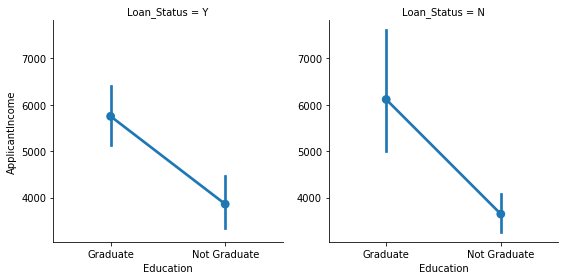

In [20]:
sns.factorplot(data=train_df, x="Education", y="ApplicantIncome", col="Loan_Status")

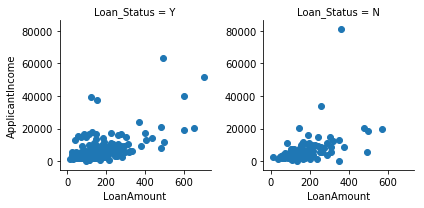

In [21]:
g = sns.FacetGrid(train_df, col="Loan_Status") 
g.map(plt.scatter, "LoanAmount", "ApplicantIncome")

In [22]:
#These two graphs tell me there isn't much of a variation of approval based on loan amount and income.
#I'll check the first 20 of the training dataset to get a better look

In [23]:
train_df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


In [24]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [25]:
#This tells me that majority of people get approved, so the trick is probably not focus on how people get approved.
#Lets concentrate on what disqualfies you, in this case the 192.

In [26]:
loan_approved=train_df['Loan_Status']=='Y'
loan_not_approved=train_df['Loan_Status']=='N'

In [27]:
train_df[loan_approved].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,422.000000,422.000000,422.000000,422.000000,422.000000
mean,5384.068720,1504.516398,144.349606,341.090047,0.969577
std,5765.441615,1924.754855,84.361109,62.644087,0.133745
min,210.000000,0.000000,17.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1239.500000,128.000000,360.000000,1.000000
75%,5771.500000,2297.250000,160.000000,360.000000,1.000000
max,63337.000000,20000.000000,700.000000,480.000000,1.000000


In [28]:
train_df[loan_not_approved].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,192.000000,192.000000,192.000000,192.000000,192.000000
mean,5446.078125,1877.807292,150.945488,344.000000,0.562232
std,6819.558528,4384.060103,83.361163,68.143673,0.488232
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2885.000000,0.000000,102.750000,360.000000,0.000000
50%,3833.500000,268.000000,133.500000,360.000000,1.000000
75%,5861.250000,2273.750000,173.000000,360.000000,1.000000
max,81000.000000,41667.000000,570.000000,480.000000,1.000000


In [29]:
#By comparing the two sets of data, it confirms the differences between the columns
#are inconsequential with the exception of credit history.

#With a total of 614 people and 422, means 69% of people with great credit get approved.
#With a total of 192 people that did not get approved, the median credit score is 50/50 (even) and the other columns are relatively the same.
#This means all things considered 31% of people regardless of income,term, credit history, etc. will be denied. 
# Could I create an algorithm that says if Y, approve all until approval limit reaches 69%, If N in Credit History, approve until approval limit reaches 31%.

In [30]:
#Since this is loan prediction and the objective is to find a binary classification based on certain features in a credit application
#We will use Two-Class SVM. I will also use Random Forest because of its historical effectiveness.

In [31]:
target=train_df['Loan_Status'].values
train_df=train_df.drop(['Dependents','Loan_ID','Loan_Status'],axis=1)
vect=['Gender','Married','Education','Self_Employed','Property_Area']

In [32]:
for column in vect:
	temp=pd.get_dummies(pd.Series(train_df[column]))
	train_df=pd.concat([train_df,temp],axis=1)
	train_df=train_df.drop([column],axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_df,target,test_size=0.20,random_state=42)
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
result=random_forest.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report

print "The accuracy of model is:",accuracy_score(y_test,result)*100
print classification_report(y_test,result)

The accuracy of model is: 77.2357723577
             precision    recall  f1-score   support

          N       0.86      0.42      0.56        43
          Y       0.75      0.96      0.85        80

avg / total       0.79      0.77      0.75       123



In [35]:
X_test=test_df.drop(['Loan_ID','Dependents'], axis=1).copy()

In [36]:
X_test=X_test.fillna(X_test.mean())
X_test['Gender']=X_test['Gender'].fillna('Male')
X_test['Self_Employed']=X_test['Self_Employed'].fillna('No')

vect=['Gender','Married','Education','Self_Employed','Property_Area']

In [37]:
for column in vect:
	temp=pd.get_dummies(pd.Series(X_test[column]))
	X_test=pd.concat([X_test,temp],axis=1)
	X_test=X_test.drop([column],axis=1)


predictions=random_forest.predict(X_test)
print predictions

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y

In [38]:
#===============Implement_Linear_SVM====================

In [39]:
#Linear SVC
print "\n"
print "Implement_Linear_SVM..........."
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")




Implement_Linear_SVM...........
(68.23, '%')
